In [1]:
import os
import matplotlib.pyplot as plt
import torch

from preprocess_images import get_image_embedding, load_image_embed, process_images_to_embeddings


In [2]:
# Load the CLIP model and processor
model, processor = load_image_embed()

/Users/ilerisoy/anaconda3/envs/pg/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
memorix_cropped_images_dir = '/Users/ilerisoy/Vlisco data/Data Folders Cropped/memorix'
website_cropped_images_dir = '/Users/ilerisoy/Vlisco data/Data Folders Cropped/website_photoshoot'
vintage_model_cropped_images_dir = '/Users/ilerisoy/Vlisco data/Data Folders Cropped/vintage_model_photoshoot'
fashion_images_0 = "/Users/ilerisoy/Vlisco data/Data Folders Cropped/fashion_images_0_short_short/"
fashion_images_1 = "/Users/ilerisoy/Vlisco data/Data Folders Cropped/fashion_images_1_short/"
# possible_vlisco = "/Users/ilerisoy/Vlisco data/Data Folders Cropped/possible_vlisco/all"
not_vlisco = "/Users/ilerisoy/Vlisco data/Data Folders Cropped/not_vlisco/"
# masked_designs = "/Users/ilerisoy/Vlisco data/Masked Design Images Short/"

actual_vlisco = "/Users/ilerisoy/Vlisco data/ACTUAL VLISCO/"

# list the filenames of the images in the directory
actual_vlisco_images = os.listdir(actual_vlisco)
for fie in actual_vlisco_images:
    print(fie)

.DS_Store
image_8.png
image_2.png
image_3.png
image_1.png
image_0.png
image_5.png
image_7.png
image_6.png


In [21]:
# # Process images and save embeddings
# memorix_image_embeddings = process_images_to_embeddings(memorix_cropped_images_dir, model, processor)
# website_image_embeddings = process_images_to_embeddings(website_cropped_images_dir, model, processor)
# vintage_image_embeddings = process_images_to_embeddings(vintage_model_cropped_images_dir, model, processor)
# fashion_image_embeddings = process_images_to_embeddings(fashion_images_0, model, processor)
# fashion_image_1_embeddings = process_images_to_embeddings(fashion_images_1, model, processor)
# possible_vlisco_embeddings = process_images_to_embeddings(possible_vlisco, model, processor)
# not_vlisco_embeddings = process_images_to_embeddings(not_vlisco, model, processor)
# masked_designs_embeddings = process_images_to_embeddings(masked_designs, model, processor)

# actual_vlisco_embeddings = process_images_to_embeddings(actual_vlisco, model, processor)
actual_vlisco_embeddings = torch.load("act_vlisco_embeddings_w16.pt")

# Load the embeddings from pt files
memorix_image_embeddings = torch.load("memorix_embeddings.pt")
website_image_embeddings = torch.load("website_photoshoot_embeddings.pt")
vintage_image_embeddings = torch.load("vintage_model_photoshoot_embeddings.pt")
fashion_image_0_embeddings = torch.load("fashion_images_0_short_short_embeddings.pt")
fashion_image_1_embeddings = torch.load("fashion_images_1_short_embeddings.pt")
possible_vlisco_embeddings = torch.load("possible_vlisco_embeddings.pt")
not_vlisco_embeddings = torch.load("not_vlisco_embeddings.pt")
masked_designs_embeddings = torch.load("masked_designs_embeddings.pt")

/var/folders/h2/0yz4qqt96pl7pfv1jmlkqfp40000gn/T/ipykernel_51934/723656409.py:12: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

/var/folders/h2/0yz4qqt96pl7pfv1jmlkqfp40000g

In [22]:
print("Memorix embeddings shape:", memorix_image_embeddings.shape)
print("Website embeddings shape:", website_image_embeddings.shape)
print("Vintage model embeddings shape:", vintage_image_embeddings.shape)
print("Fashion images 0 embeddings shape:", fashion_image_0_embeddings.shape)
print("Fashion images 1 embeddings shape:", fashion_image_1_embeddings.shape)
print("Possible Vlisco embeddings shape:", possible_vlisco_embeddings.shape)
# print("Not Vlisco embeddings shape:", not_vlisco_embeddings.shape)
print("ACtual Vlisco embeddings shape:", actual_vlisco_embeddings.shape)

Memorix embeddings shape: torch.Size([231, 768])
Website embeddings shape: torch.Size([43, 768])
Vintage model embeddings shape: torch.Size([437, 768])
Fashion images 0 embeddings shape: torch.Size([428, 768])
Fashion images 1 embeddings shape: torch.Size([447, 768])
Possible Vlisco embeddings shape: torch.Size([126, 768])
ACtual Vlisco embeddings shape: torch.Size([8, 768])


# t-SNE

In [23]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def visualize_embeddings_with_tsne(embedding_tensors, dataset_names, colors=None):
    """
    Visualize an arbitrary number of embedding tensors using t-SNE.

    Args:
        embedding_tensors (list of torch.Tensor): List of embedding tensors for each dataset.
        dataset_names (list of str): List of dataset names corresponding to the embeddings.
        colors (list of str, optional): List of colors for each dataset. If None, default colors are used.
    """
    # Combine all embeddings
    all_embeddings = torch.vstack(embedding_tensors)

    # Create labels for each dataset
    all_labels = np.concatenate([
        np.full(embedding.shape[0], idx) for idx, embedding in enumerate(embedding_tensors)
    ])

    # Convert embeddings to numpy (if they are not already)
    all_embeddings_np = all_embeddings.cpu().numpy()

    
    try:
        # Load the t-SNE model if it exists
        tsne = torch.load('tsne_model.pt')
    except FileNotFoundError:
        # Create a new t-SNE object
        tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

    # Apply t-SNE
    embeddings_2d = tsne.fit_transform(all_embeddings_np)
    
    # # Save the t-SNE object using torch
    # torch.save(tsne, 'tsne_model.pt')

    print("t-SNE model saved as tsne_model.pt")

    # Define default colors if not provided
    if colors is None:
        colors = ['black', 'blue', 'green', 'purple', 'red', 'cyan', 'orange', 'yellow', 'magenta', 'pink']

    # Plot the results
    plt.figure(figsize=(10, 8))
    for label, color in zip(range(len(dataset_names)), colors):
        plt.scatter(
            embeddings_2d[all_labels == label, 0],
            embeddings_2d[all_labels == label, 1],
            c=color,
            label=f'{dataset_names[label]}',
            alpha=0.6
        )
    plt.title('t-SNE Visualization of Embedding Space Overlap')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend()
    plt.show()

    return all_embeddings, all_labels, embeddings_2d

/var/folders/h2/0yz4qqt96pl7pfv1jmlkqfp40000gn/T/ipykernel_51934/3033889642.py:29: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



t-SNE model saved as tsne_model.pt


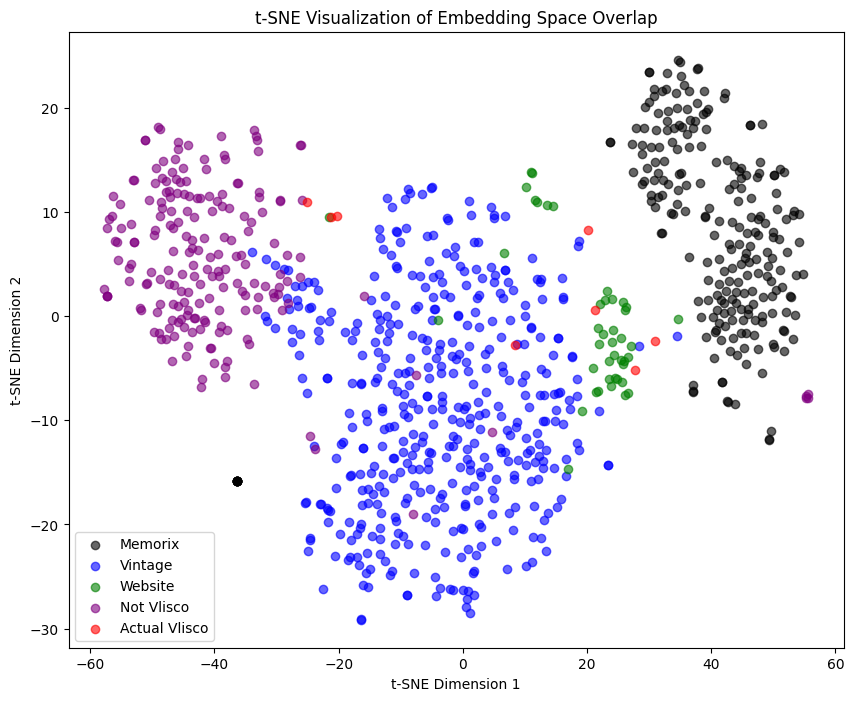

In [24]:
# List of embedding tensors and corresponding dataset names
# embedding_tensors = [memorix_image_embeddings, website_image_embeddings, vintage_image_embeddings, fashion_image_0_embeddings, fashion_image_1_embeddings, possible_vlisco_embeddings_week_10, possible_vlisco_embeddings_week_11, not_vlisco_embeddings, possible_vlisco_embeddings]
# dataset_names = ['Memorix', 'Website', 'Vintage', 'Fashion Plain', 'Fashion Intricate', 'Possible Vlisco Week 10', 'Possible Vlisco Week 11', 'Not Vlisco', 'Possible Vlisco']

embedding_tensors = [memorix_image_embeddings, vintage_image_embeddings, website_image_embeddings, not_vlisco_embeddings, actual_vlisco_embeddings]
dataset_names = ['Memorix', 'Vintage', 'Website', 'Not Vlisco', 'Actual Vlisco']


# Call the function
all_embeddings, all_labels, embeddings_2d_tsne = visualize_embeddings_with_tsne(embedding_tensors, dataset_names)

# # Assuming embedding_tensors is a list of tensors and dataset_names is a list of names
# selected_indices = [0, 2, 5, 6, 7, 8]
# selected_embeddings = [embedding_tensors[i] for i in selected_indices]
# selected_labels = [dataset_names[i] for i in selected_indices]

# # Now you can pass the selected embeddings and labels to your function
# all_embeddings, all_labels = visualize_embeddings_with_tsne(all_embeddings, all_labels)

/var/folders/h2/0yz4qqt96pl7pfv1jmlkqfp40000gn/T/ipykernel_51934/3033889642.py:29: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



t-SNE model saved as tsne_model.pt


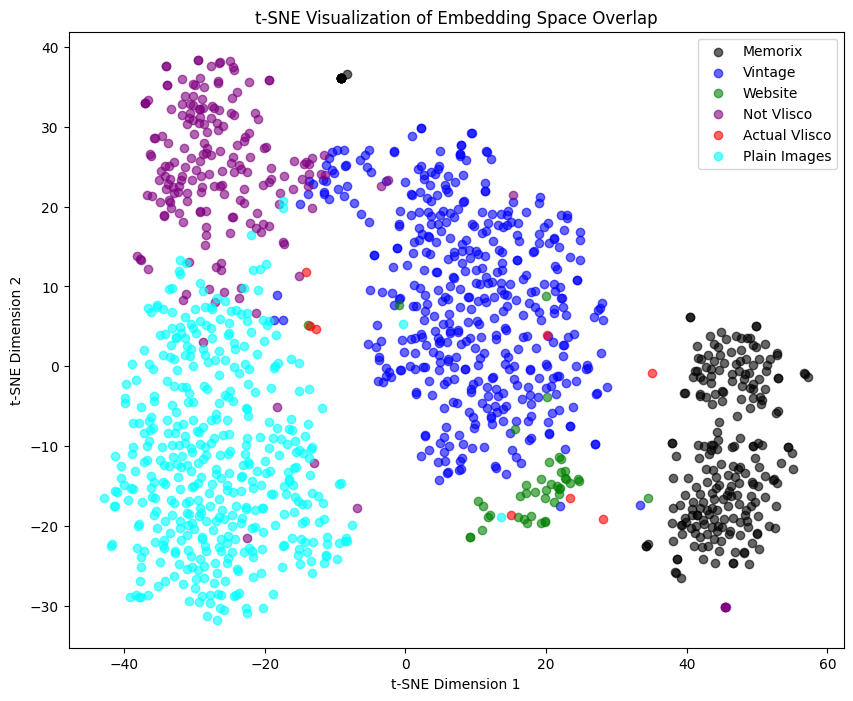

In [25]:
# List of embedding tensors and corresponding dataset names
# embedding_tensors = [memorix_image_embeddings, website_image_embeddings, vintage_image_embeddings, fashion_image_0_embeddings, fashion_image_1_embeddings, possible_vlisco_embeddings_week_10, possible_vlisco_embeddings_week_11, not_vlisco_embeddings, possible_vlisco_embeddings]
# dataset_names = ['Memorix', 'Website', 'Vintage', 'Fashion Plain', 'Fashion Intricate', 'Possible Vlisco Week 10', 'Possible Vlisco Week 11', 'Not Vlisco', 'Possible Vlisco']

embedding_tensors = [memorix_image_embeddings, vintage_image_embeddings, website_image_embeddings, not_vlisco_embeddings, actual_vlisco_embeddings, fashion_image_0_embeddings]
dataset_names = ['Memorix', 'Vintage', 'Website', 'Not Vlisco', 'Actual Vlisco', 'Plain Images']


# Call the function
all_embeddings, all_labels, embeddings_2d_tsne = visualize_embeddings_with_tsne(embedding_tensors, dataset_names)

# # Assuming embedding_tensors is a list of tensors and dataset_names is a list of names
# selected_indices = [0, 2, 5, 6, 7, 8]
# selected_embeddings = [embedding_tensors[i] for i in selected_indices]
# selected_labels = [dataset_names[i] for i in selected_indices]

# # Now you can pass the selected embeddings and labels to your function
# all_embeddings, all_labels = visualize_embeddings_with_tsne(all_embeddings, all_labels)

# t-SNE 3D

In [26]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting

def visualize_embeddings_with_tsne(embedding_tensors, dataset_names, colors=None):
    """
    Visualize an arbitrary number of embedding tensors using 3D t-SNE.

    Args:
        embedding_tensors (list of torch.Tensor): List of embedding tensors for each dataset.
        dataset_names (list of str): List of dataset names corresponding to the embeddings.
        colors (list of str, optional): List of colors for each dataset. If None, default colors are used.
    """
    # Combine all embeddings
    all_embeddings = torch.vstack(embedding_tensors)

    # Create labels for each dataset
    all_labels = np.concatenate([
        np.full(embedding.shape[0], idx) for idx, embedding in enumerate(embedding_tensors)
    ])

    # Convert embeddings to numpy (if they are not already)
    all_embeddings_np = all_embeddings.cpu().numpy()

    # Create a new t-SNE object with 3 components
    tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
            
    # Apply t-SNE to reduce dimensions to 3
    embeddings_3d = tsne.fit_transform(all_embeddings_np)
    
    # # Save the t-SNE object using torch (uncomment if needed)
    # torch.save(tsne, 'tsne_model.pt')
    print("t-SNE model saved as tsne_model.pt")

    # Define default colors if not provided
    if colors is None:
        colors = ['black', 'blue', 'green', 'purple', 'red', 'cyan', 'orange', 'yellow', 'magenta', 'pink']

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for label, color in zip(range(len(dataset_names)), colors):
        indices = all_labels == label
        ax.scatter(
            embeddings_3d[indices, 0],
            embeddings_3d[indices, 1],
            embeddings_3d[indices, 2],
            c=color,
            label=f'{dataset_names[label]}',
            alpha=0.6
        )
    ax.set_title('3D t-SNE Visualization of Embedding Space Overlap')
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_zlabel('t-SNE Dimension 3')
    ax.legend()
    plt.show()

    return all_embeddings, all_labels, embeddings_3d

t-SNE model saved as tsne_model.pt


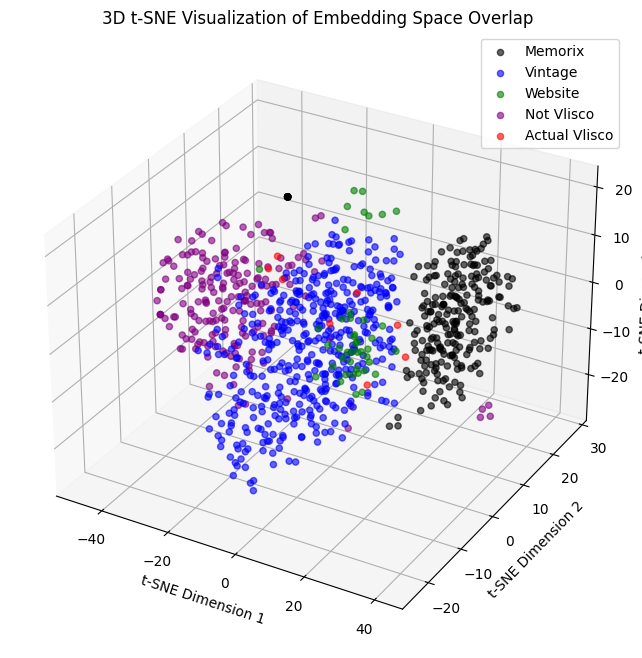

In [27]:
# List of embedding tensors and corresponding dataset names
# embedding_tensors = [memorix_image_embeddings, website_image_embeddings, vintage_image_embeddings, fashion_image_0_embeddings, fashion_image_1_embeddings, possible_vlisco_embeddings_week_10, possible_vlisco_embeddings_week_11, not_vlisco_embeddings, possible_vlisco_embeddings]
# dataset_names = ['Memorix', 'Website', 'Vintage', 'Fashion Plain', 'Fashion Intricate', 'Possible Vlisco Week 10', 'Possible Vlisco Week 11', 'Not Vlisco', 'Possible Vlisco']

embedding_tensors = [memorix_image_embeddings, vintage_image_embeddings, website_image_embeddings, not_vlisco_embeddings, actual_vlisco_embeddings]
dataset_names = ['Memorix', 'Vintage', 'Website', 'Not Vlisco', 'Actual Vlisco']


# Call the function
all_embeddings, all_labels, embeddings_2d_tsne = visualize_embeddings_with_tsne(embedding_tensors, dataset_names)

# # Assuming embedding_tensors is a list of tensors and dataset_names is a list of names
# selected_indices = [0, 2, 5, 6, 7, 8]
# selected_embeddings = [embedding_tensors[i] for i in selected_indices]
# selected_labels = [dataset_names[i] for i in selected_indices]

# # Now you can pass the selected embeddings and labels to your function
# all_embeddings, all_labels = visualize_embeddings_with_tsne(all_embeddings, all_labels)

In [28]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import plotly.graph_objects as go

def visualize_embeddings_with_tsne(embedding_tensors, dataset_names, colors=None):
    """
    Visualize an arbitrary number of embedding tensors using interactive 3D t-SNE.

    Args:
        embedding_tensors (list of torch.Tensor): List of embedding tensors for each dataset.
        dataset_names (list of str): List of dataset names corresponding to the embeddings.
        colors (list of str, optional): List of colors for each dataset. If None, default colors are used.
    """
    # Combine all embeddings
    all_embeddings = torch.vstack(embedding_tensors)

    # Create labels for each dataset
    all_labels = np.concatenate([
        np.full(embedding.shape[0], idx) for idx, embedding in enumerate(embedding_tensors)
    ])

    # Convert embeddings to numpy
    all_embeddings_np = all_embeddings.cpu().numpy()

    # Create a new t-SNE object with 3 components
    tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
            
    # Apply t-SNE to reduce dimensions to 3
    embeddings_3d = tsne.fit_transform(all_embeddings_np)
    
    # # Save the t-SNE object using torch if needed
    # torch.save(tsne, 'tsne_model.pt')
    print("t-SNE model saved as tsne_model.pt")

    # Define default colors if not provided
    if colors is None:
        colors = ['black', 'blue', 'green', 'purple', 'red', 'cyan', 'orange', 'yellow', 'magenta', 'pink']

    # Create interactive 3D plot using Plotly
    fig = go.Figure()
    for label, color in zip(range(len(dataset_names)), colors):
        indices = all_labels == label
        trace = go.Scatter3d(
            x=embeddings_3d[indices, 0],
            y=embeddings_3d[indices, 1],
            z=embeddings_3d[indices, 2],
            mode='markers',
            marker=dict(
                size=5,
                color=color,
                opacity=0.6
            ),
            name=dataset_names[label]
        )
        fig.add_trace(trace)
    
    fig.update_layout(
        title='Interactive 3D t-SNE Visualization of Embedding Space Overlap',
        scene=dict(
            xaxis_title='t-SNE Dimension 1',
            yaxis_title='t-SNE Dimension 2',
            zaxis_title='t-SNE Dimension 3'
        )
    )
    
    # Display the interactive plot
    fig.show()

    return all_embeddings, all_labels, embeddings_3d



# List of embedding tensors and corresponding dataset names
# embedding_tensors = [memorix_image_embeddings, website_image_embeddings, vintage_image_embeddings, fashion_image_0_embeddings, fashion_image_1_embeddings, possible_vlisco_embeddings_week_10, possible_vlisco_embeddings_week_11, not_vlisco_embeddings, possible_vlisco_embeddings]
# dataset_names = ['Memorix', 'Website', 'Vintage', 'Fashion Plain', 'Fashion Intricate', 'Possible Vlisco Week 10', 'Possible Vlisco Week 11', 'Not Vlisco', 'Possible Vlisco']

embedding_tensors = [memorix_image_embeddings, vintage_image_embeddings, website_image_embeddings, not_vlisco_embeddings, actual_vlisco_embeddings]
dataset_names = ['Memorix', 'Vintage', 'Website', 'Not Vlisco', 'Actual Vlisco']


# Call the function
all_embeddings, all_labels, embeddings_2d_tsne = visualize_embeddings_with_tsne(embedding_tensors, dataset_names)

# # Assuming embedding_tensors is a list of tensors and dataset_names is a list of names
# selected_indices = [0, 2, 5, 6, 7, 8]
# selected_embeddings = [embedding_tensors[i] for i in selected_indices]
# selected_labels = [dataset_names[i] for i in selected_indices]

# # Now you can pass the selected embeddings and labels to your function
# all_embeddings, all_labels = visualize_embeddings_with_tsne(all_embeddings, all_labels)

t-SNE model saved as tsne_model.pt


# U-map

In [29]:
import torch
import numpy as np
import umap.umap_ as umap
import plotly.graph_objects as go

def visualize_embeddings_with_umap(embedding_tensors, dataset_names, dims=2, colors=None):
    """
    Visualize embeddings using UMAP with an interactive Plotly plot.

    Args:
        embedding_tensors (list of torch.Tensor): List of embedding tensors.
        dataset_names (list of str): Names for each dataset.
        dims (int): Number of dimensions (2 or 3) for the UMAP projection.
        colors (list of str, optional): Colors for each dataset.
    """
    # Combine all embeddings
    all_embeddings = torch.vstack(embedding_tensors)

    # Create labels for each dataset
    all_labels = np.concatenate([
        np.full(embedding.shape[0], idx) for idx, embedding in enumerate(embedding_tensors)
    ])

    # Try loading an existing UMAP model, otherwise create a new one with specified dims
    try:
        umap_reducer = torch.load('umap_model_originallll.pt')
    except FileNotFoundError:
        print("Creating a new UMAP object")
        umap_reducer = umap.UMAP(random_state=42, n_components=dims)

    # Apply UMAP
    embeddings_umap = umap_reducer.fit_transform(all_embeddings.cpu().numpy())

    # Define default colors if not provided
    if colors is None:
        colors = ['black', 'red', 'blue', 'green', 'orange', 'cyan', 'purple', 'yellow', 'magenta', 'pink']

    # Create an interactive Plotly plot
    fig = go.Figure()

    if dims == 2:
        for label in np.unique(all_labels):
            indices = all_labels == label
            fig.add_trace(go.Scatter(
                x=embeddings_umap[indices, 0],
                y=embeddings_umap[indices, 1],
                mode='markers',
                marker=dict(
                    size=5,
                    color=colors[int(label)],
                    opacity=0.6
                ),
                name=dataset_names[int(label)]
            ))
        fig.update_layout(
            title='Interactive UMAP Projection of the Embeddings (2D)',
            xaxis_title='UMAP Dimension 1',
            yaxis_title='UMAP Dimension 2',
            width=800,
            height=600
        )
    elif dims == 3:
        for label in np.unique(all_labels):
            indices = all_labels == label
            fig.add_trace(go.Scatter3d(
                x=embeddings_umap[indices, 0],
                y=embeddings_umap[indices, 1],
                z=embeddings_umap[indices, 2],
                mode='markers',
                marker=dict(
                    size=5,
                    color=colors[int(label)],
                    opacity=0.6
                ),
                name=dataset_names[int(label)]
            ))
        fig.update_layout(
            title='Interactive UMAP Projection of the Embeddings (3D)',
            scene=dict(
                xaxis_title='UMAP Dimension 1',
                yaxis_title='UMAP Dimension 2',
                zaxis_title='UMAP Dimension 3'
            ),
            width=800,
            height=600
        )
    else:
        raise ValueError("dims must be either 2 or 3")

    fig.show()

    return all_embeddings, all_labels, embeddings_umap

In [33]:

embedding_tensors = [not_vlisco_embeddings, fashion_image_0_embeddings, memorix_image_embeddings, vintage_image_embeddings, website_image_embeddings, actual_vlisco_embeddings[3:]]
dataset_names = ['Not Vlisco', 'Plain Images', 'Memorix', 'Vintage', 'Website', 'Actual Vlisco']

# Combine all embeddings
all_embeddings = torch.vstack(embedding_tensors)

# Create labels for each dataset
all_labels = np.concatenate([
    np.full(embedding.shape[0], idx) for idx, embedding in enumerate(embedding_tensors)
])

# Define colors for each dataset
colors = ['black', 'red', 'blue', 'green', 'orange', 'cyan', 'purple', 'yellow', 'magenta', 'pink']

visualize_embeddings_with_umap(embedding_tensors, dataset_names, dims=3, colors=colors)

/var/folders/h2/0yz4qqt96pl7pfv1jmlkqfp40000gn/T/ipykernel_51934/3670570434.py:26: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

/Users/ilerisoy/anaconda3/envs/pg/lib/python

Creating a new UMAP object


(tensor([[ 0.4443,  0.8827, -0.1021,  ...,  0.2069, -0.0854,  0.7333],
         [ 0.4602,  1.2414,  0.6932,  ...,  0.0530,  0.1155, -0.2865],
         [-0.0676,  1.2981,  0.5418,  ..., -0.0922, -0.7940,  0.2960],
         ...,
         [ 0.1139,  0.9004,  0.3629,  ..., -0.1981,  0.2425, -0.3454],
         [-0.2042, -0.0493,  0.1580,  ..., -0.0226,  0.2428, -0.0657],
         [-0.0059, -0.4967,  0.0936,  ..., -0.9020,  0.1844, -0.1902]],
        device='mps:0'),
 array([0, 0, 0, ..., 5, 5, 5]),
 array([[13.942646 ,  6.126246 ,  3.7336917],
        [13.563339 ,  5.461182 ,  2.997586 ],
        [13.404958 ,  5.840319 ,  3.1063256],
        ...,
        [ 7.1135044,  6.246294 ,  4.8297567],
        [13.065039 ,  8.981104 ,  3.9868457],
        [ 7.6740994,  6.248116 ,  4.5901375]], dtype=float32))

/var/folders/h2/0yz4qqt96pl7pfv1jmlkqfp40000gn/T/ipykernel_51934/1728592232.py:22: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



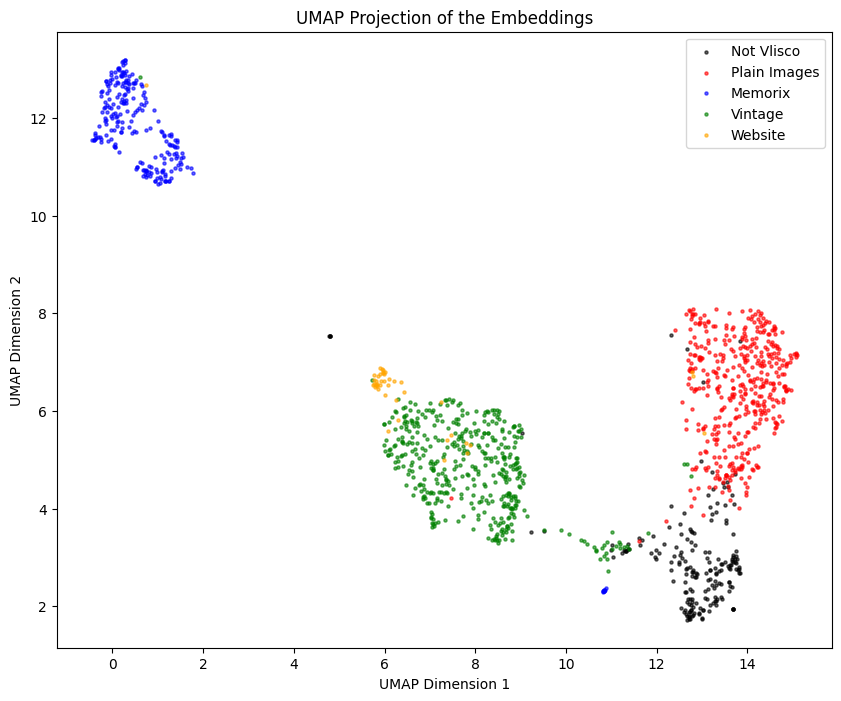

In [15]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np

# Example embedding tensors and labels (replace with your actual data)
# all_embeddings is a stacked tensor of embeddings from multiple datasets
# all_labels is a numpy array of labels indicating which dataset each embedding belongs to

embedding_tensors = [not_vlisco_embeddings, fashion_image_0_embeddings, memorix_image_embeddings, vintage_image_embeddings, website_image_embeddings]
dataset_names = ['Not Vlisco', 'Plain Images', 'Memorix', 'Vintage', 'Website']

# Combine all embeddings
all_embeddings = torch.vstack(embedding_tensors)

# Create labels for each dataset
all_labels = np.concatenate([
    np.full(embedding.shape[0], idx) for idx, embedding in enumerate(embedding_tensors)
])

try:
    # Load the UMAP model if it exists
    umap_reducer = torch.load('umap_model_original.pt')
except FileNotFoundError:
    # Create a new UMAP object
    print("Creating a new UMAP object")
    umap_reducer = umap.UMAP(random_state=42)

# Apply UMAP
embeddings_2d_umap = umap_reducer.fit_transform(all_embeddings.cpu().numpy())


# umap_reducer = torch.load('umap_model_original.pt')
# embeddings_2d_umap = umap_reducer.transform(all_embeddings.cpu().numpy())

# Define colors for each dataset
colors = ['black', 'red', 'blue', 'green', 'orange', 'cyan', 'purple', 'yellow', 'magenta', 'pink']

# Plot the results with color information
plt.figure(figsize=(10, 8))
for label, color in zip(np.unique(all_labels), colors):
    plt.scatter(
        embeddings_2d_umap[all_labels == label, 0],
        embeddings_2d_umap[all_labels == label, 1],
        c=color,
        label=f'{dataset_names[label]}',
        s=5,
        alpha=0.6
    )
plt.title('UMAP Projection of the Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()

/var/folders/h2/0yz4qqt96pl7pfv1jmlkqfp40000gn/T/ipykernel_45645/594384365.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  umap_reducer = torch.load('umap_model_origina

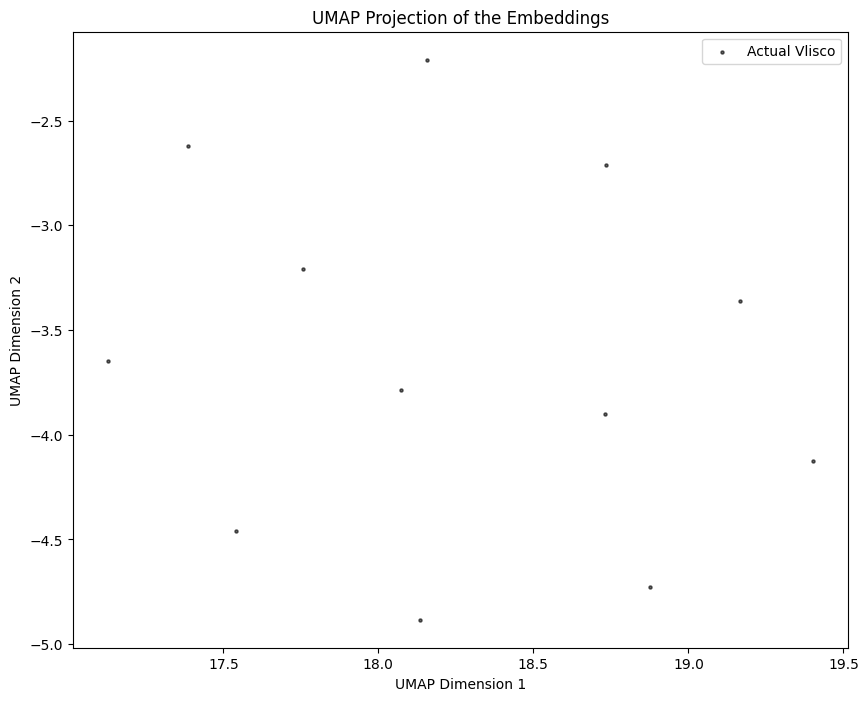

In [11]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np

# Example embedding tensors and labels (replace with your actual data)
# all_embeddings is a stacked tensor of embeddings from multiple datasets
# all_labels is a numpy array of labels indicating which dataset each embedding belongs to

embedding_tensors = [actual_vlisco_embeddings]
dataset_names = ['Actual Vlisco']

# Combine all embeddings
all_embeddings = torch.vstack(embedding_tensors)

# Create labels for each dataset
all_labels = np.concatenate([
    np.full(embedding.shape[0], idx) for idx, embedding in enumerate(embedding_tensors)
])

try:
    # Load the UMAP model if it exists
    umap_reducer = torch.load('umap_model_original.pt')
except FileNotFoundError:
    # Create a new UMAP object
    print("Creating a new UMAP object")
    umap_reducer = umap.UMAP(random_state=42)

# Apply UMAP
embeddings_2d_umap = umap_reducer.fit_transform(all_embeddings.cpu().numpy())


# umap_reducer = torch.load('umap_model_original.pt')
# embeddings_2d_umap = umap_reducer.transform(all_embeddings.cpu().numpy())

# Define colors for each dataset
colors = ['black', 'red', 'blue', 'green', 'orange', 'cyan', 'purple', 'yellow', 'magenta', 'pink']

# Plot the results with color information
plt.figure(figsize=(10, 8))
for label, color in zip(np.unique(all_labels), colors):
    plt.scatter(
        embeddings_2d_umap[all_labels == label, 0],
        embeddings_2d_umap[all_labels == label, 1],
        c=color,
        label=f'{dataset_names[label]}',
        s=5,
        alpha=0.6
    )
plt.title('UMAP Projection of the Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()

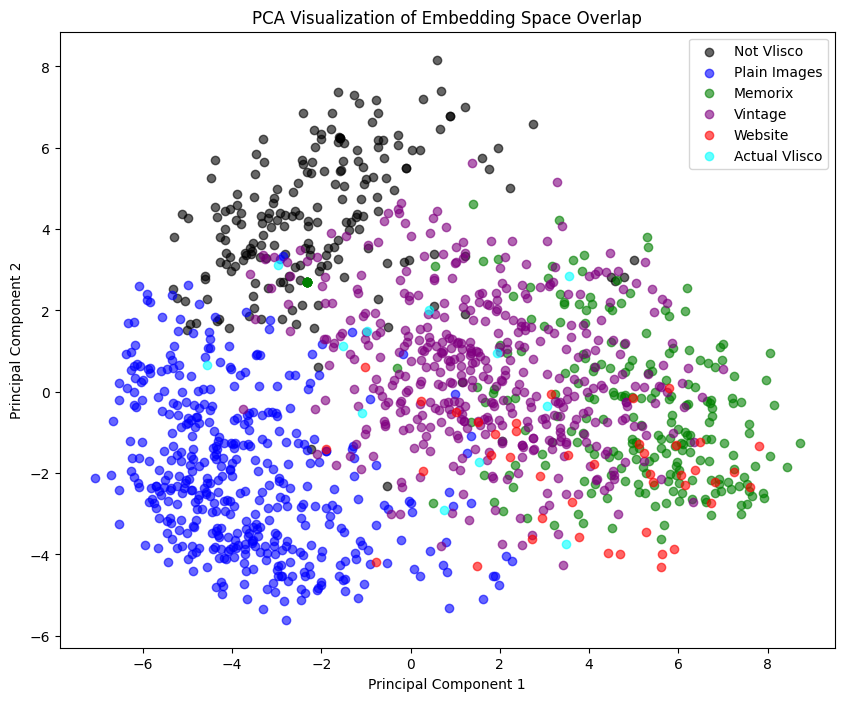

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_embeddings_with_pca(embedding_tensors, dataset_names, colors=None):
    """
    Visualize an arbitrary number of embedding tensors using PCA.

    Args:
        embedding_tensors (list of torch.Tensor): List of embedding tensors for each dataset.
        dataset_names (list of str): List of dataset names corresponding to the embeddings.
        colors (list of str, optional): List of colors for each dataset. If None, default colors are used.
    """
    # Combine all embeddings
    all_embeddings = torch.vstack(embedding_tensors)

    # Create labels for each dataset
    all_labels = np.concatenate([
        np.full(embedding.shape[0], idx) for idx, embedding in enumerate(embedding_tensors)
    ])

    # Convert embeddings to numpy (if they are not already)
    all_embeddings_np = all_embeddings.cpu().numpy()

    # Apply PCA
    pca = PCA(n_components=2, random_state=42)  # Reduce to 2 dimensions
    embeddings_2d = pca.fit_transform(all_embeddings_np)

    # Define default colors if not provided
    if colors is None:
        colors = ['black', 'blue', 'green', 'purple', 'red', 'cyan', 'orange', 'yellow', 'magenta', 'pink']

    # Plot the results
    plt.figure(figsize=(10, 8))
    for label, color in zip(range(len(dataset_names)), colors):
        plt.scatter(
            embeddings_2d[all_labels == label, 0],
            embeddings_2d[all_labels == label, 1],
            c=color,
            label=f'{dataset_names[label]}',
            alpha=0.6
        )
    plt.title('PCA Visualization of Embedding Space Overlap')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

    return embeddings_2d

# Call the function
embeddings_2d_pca = visualize_embeddings_with_pca(embedding_tensors, dataset_names)

# Confusion Matrix Analysis

In [14]:
# Dictionary to assign binary labels to embeddings
label_dict = {
    memorix_image_embeddings: 1,
    vintage_image_embeddings: 1,
    website_image_embeddings: 1,
    possible_vlisco_embeddings: 1,
    not_vlisco_embeddings: 0,
    # masked_designs_embeddings: 1
}

In [28]:
# Assuming all_labels is a list of labels
true_classes = np.array([0 if label == 0 or label == 1 else 1 for label in all_labels])

print(true_classes)

[0 0 0 ... 1 1 1]


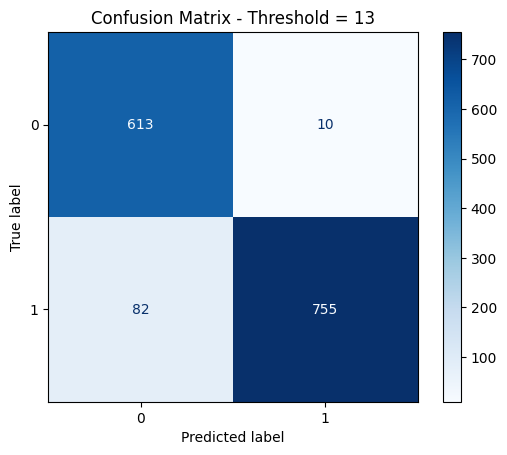

Model (Threshold = 12)
Accuracy: 0.9370
Precision: 0.9869
Recall: 0.9020
F1 Score: 0.9426
----------------------------------------


In [31]:
threshold = 12

predicted_labels = np.zeros_like(true_classes)
for i in range(len(embeddings_2d_umap)):
    dim_1 = embeddings_2d_umap[i, 0]
    if dim_1 < threshold:
        predicted_labels[i] = 1
    else:
        predicted_labels[i] = 0

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
)

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - Threshold = {threshold+1}")
plt.show()

# Print metrics at the specified threshold
accuracy = accuracy_score(true_classes, predicted_labels)
precision = precision_score(true_classes, predicted_labels)
recall = recall_score(true_classes, predicted_labels)
f1 = f1_score(true_classes, predicted_labels)

print(f"Model (Threshold = {threshold})")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("-" * 40)

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Apply K-means clustering to the embeddings
kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_tsne = KMeans(n_clusters=2, random_state=42)

# Fit and predict clusters
pca_clusters = kmeans_pca.fit_predict(embeddings_2d_pca)
tsne_clusters = kmeans_tsne.fit_predict(embeddings_2d_tsne)

# Compute silhouette scores
silhouette_pca = silhouette_score(embeddings_2d_pca, pca_clusters)
silhouette_tsne = silhouette_score(embeddings_2d_tsne, tsne_clusters)

print(f"Silhouette Score (PCA): {silhouette_pca}")
print(f"Silhouette Score (t-SNE): {silhouette_tsne}")

Silhouette Score (PCA): 0.542671263217926
Silhouette Score (t-SNE): 0.5752452611923218


/Users/ilerisoy/anaconda3/envs/pg/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilerisoy/anaconda3/envs/pg/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
from sklearn.manifold import trustworthiness

all_embeddings_np = all_embeddings.cpu().numpy()

# Compute trustworthiness scores
trustworthiness_pca = trustworthiness(all_embeddings_np, embeddings_2d_pca, n_neighbors=10)
trustworthiness_tsne = trustworthiness(all_embeddings_np, embeddings_2d_tsne, n_neighbors=10)

print(f"Trustworthiness (PCA): {trustworthiness_pca}")
print(f"Trustworthiness (t-SNE): {trustworthiness_tsne}")

Trustworthiness (PCA): 0.822567991821405
Trustworthiness (t-SNE): 0.9422219966502563


In [13]:
from dcor import distance_correlation

# Compute pairwise distances in the original and reduced spaces
from scipy.spatial.distance import pdist, squareform

original_distances = pdist(all_embeddings_np)
pca_distances = pdist(embeddings_2d_pca)
tsne_distances = pdist(embeddings_2d_tsne)

# Compute distance correlation
distance_corr_pca = distance_correlation(original_distances, pca_distances)
distance_corr_tsne = distance_correlation(original_distances, tsne_distances)

print(f"Distance Correlation (PCA): {distance_corr_pca}")
print(f"Distance Correlation (t-SNE): {distance_corr_tsne}")

Distance Correlation (PCA): 0.7384478155249163
Distance Correlation (t-SNE): 0.6545091836173589
